In [1]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, median_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load data
df = pd.read_csv('New Dataframe.csv')
X = df.drop(columns=['Target'])  # Replace 'Target' with the actual name of your target column
y = df['Target']

# Split data into train (65%), validate (20%), and test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.35, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4286, random_state=42)  # 0.4286 ≈ 15% of total data

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Initialize and fit Ridge regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Predictions
y_val_pred = ridge.predict(X_val)
y_test_pred = ridge.predict(X_test)

# Evaluation metrics
metrics = {
    "Validation R²": round(r2_score(y_val, y_val_pred), 2),
    "Validation MAE": round(mean_absolute_error(y_val, y_val_pred), 2),
    "Validation MedAE": round(median_absolute_error(y_val, y_val_pred), 2),
    "Validation RMSE": round(np.sqrt(mean_squared_error(y_val, y_val_pred)), 2),
    "Test R²": round(r2_score(y_test, y_test_pred), 2),
    "Test MAE": round(mean_absolute_error(y_test, y_test_pred), 2),
    "Test MedAE": round(median_absolute_error(y_test, y_test_pred), 2),
    "Test RMSE": round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 2),
}

# Additional statistics
val_stats = {
    "Validation Std Dev": round(np.std(y_val_pred), 2),
    "Validation Avg": round(np.mean(y_val_pred), 2),
    "Validation Min": round(np.min(y_val_pred), 2),
    "Validation Max": round(np.max(y_val_pred), 2),
}

test_stats = {
    "Test Std Dev": round(np.std(y_test_pred), 2),
    "Test Avg": round(np.mean(y_test_pred), 2),
    "Test Min": round(np.min(y_test_pred), 2),
    "Test Max": round(np.max(y_test_pred), 2),
}

# Print metrics
print("Evaluation Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value}")

print("\nValidation Set Statistics:")
for stat, value in val_stats.items():
    print(f"{stat}: {value}")

print("\nTest Set Statistics:")
for stat, value in test_stats.items():
    print(f"{stat}: {value}")

Evaluation Metrics:
Validation R²: 0.79
Validation MAE: 48.36
Validation MedAE: 28.11
Validation RMSE: 96.64
Test R²: 0.79
Test MAE: 52.55
Test MedAE: 25.37
Test RMSE: 100.47

Validation Set Statistics:
Validation Std Dev: 203.13
Validation Avg: 189.65
Validation Min: -34.94
Validation Max: 565.27

Test Set Statistics:
Test Std Dev: 198.97
Test Avg: 220.25
Test Min: -50.56
Test Max: 518.37


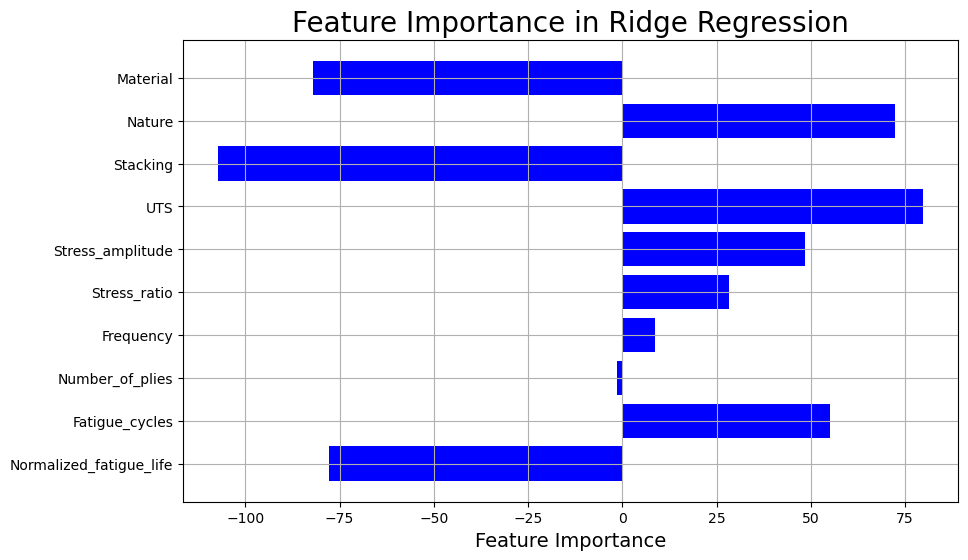

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance (absolute coefficients of the model)
feature_importance = ridge.coef_
feature_names = X.columns  # Replace this if column names differ

# Plotting feature importance as a bar graph
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance, color='blue')
plt.xlabel('Feature Importance', fontsize=14)
plt.title('Feature Importance in Ridge Regression', fontsize=20)
plt.gca().invert_yaxis()  # Highest importance on top
plt.grid(True)

# Save the plot as an image
#plt.savefig('RR.tiff', bbox_inches='tight', pad_inches=0.1)  # Add padding to avoid clipping)
plt.show()

In [2]:
import pandas as pd
import numpy as np
import warnings
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, median_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Suppress warnings
warnings.filterwarnings('ignore')

# Load data
df = pd.read_csv('New Dataframe.csv')
X = df.drop(columns=['Target'])  # Replace 'Target' with the actual name of your target column
y = df['Target']

# Split data into train (65%), validate (20%), and test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.35, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4286, random_state=42)  # 0.4286 ≈ 15% of total data

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Set up hyperparameter grid for GridSearchCV
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
}

# Initialize Ridge regression model with GridSearchCV
ridge = Ridge()
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Extract best model
RR_GS = grid_search.best_estimator_
best_params = grid_search.best_params_
cv_r2 = grid_search.best_score_

# Display best parameters and R² of cross-validation
print("Best Parameters:", best_params)
print("Cross-Validation R²:", round(cv_r2, 2))

# Validation and test predictions
y_val_pred = RR_GS.predict(X_val)
y_test_pred_gs = RR_GS.predict(X_test)

# Evaluation metrics
metrics = {
    "Validation R²": round(r2_score(y_val, y_val_pred), 2),
    "Validation MAE": round(mean_absolute_error(y_val, y_val_pred), 2),
    "Validation MedAE": round(median_absolute_error(y_val, y_val_pred), 2),
    "Validation RMSE": round(np.sqrt(mean_squared_error(y_val, y_val_pred)), 2),
    "Test R²": round(r2_score(y_test, y_test_pred_gs), 2),
    "Test MAE": round(mean_absolute_error(y_test, y_test_pred_gs), 2),
    "Test MedAE": round(median_absolute_error(y_test, y_test_pred_gs), 2),
    "Test RMSE": round(np.sqrt(mean_squared_error(y_test, y_test_pred_gs)), 2),
}

# Additional statistics for validation and test predictions
val_stats = {
    "Validation Std Dev": round(np.std(y_val_pred), 2),
    "Validation Avg": round(np.mean(y_val_pred), 2),
    "Validation Min": round(np.min(y_val_pred), 2),
    "Validation Max": round(np.max(y_val_pred), 2),
}

test_stats = {
    "Test Std Dev": round(np.std(y_test_pred_gs), 2),
    "Test Avg": round(np.mean(y_test_pred_gs), 2),
    "Test Min": round(np.min(y_test_pred_gs), 2),
    "Test Max": round(np.max(y_test_pred_gs), 2),
}

# Print metrics
print("\nEvaluation Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value}")

# Print additional statistics
print("\nValidation Set Statistics:")
for stat, value in val_stats.items():
    print(f"{stat}: {value}")

print("\nTest Set Statistics:")
for stat, value in test_stats.items():
    print(f"{stat}: {value}")

Best Parameters: {'alpha': 0.0001, 'solver': 'sparse_cg'}
Cross-Validation R²: 0.89

Evaluation Metrics:
Validation R²: 0.79
Validation MAE: 50.93
Validation MedAE: 27.45
Validation RMSE: 97.49
Test R²: 0.8
Test MAE: 51.98
Test MedAE: 25.4
Test RMSE: 99.07

Validation Set Statistics:
Validation Std Dev: 211.13
Validation Avg: 190.31
Validation Min: -27.45
Validation Max: 596.99

Test Set Statistics:
Test Std Dev: 198.66
Test Avg: 224.27
Test Min: -27.87
Test Max: 538.04


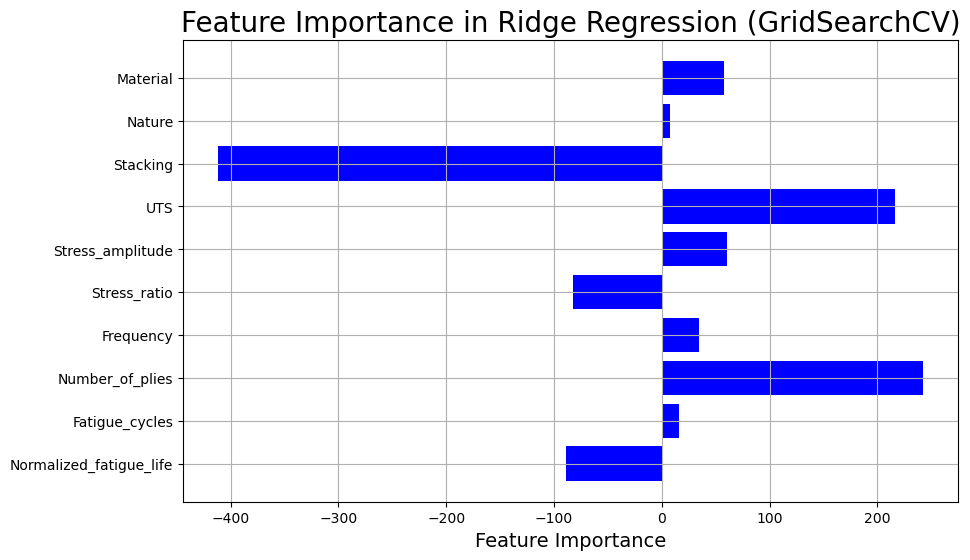

In [ ]:
import matplotlib.pyplot as plt

# Get feature importance (absolute coefficients of the best model)
feature_importance = RR_GS.coef_
feature_names = X.columns  # Replace this if column names differ

# Plotting feature importance as a bar graph
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance, color='blue')
plt.xlabel('Feature Importance', fontsize = 14)
plt.title('Feature Importance in Ridge Regression (GridSearchCV)', fontsize = 20)
plt.gca().invert_yaxis()  # Highest importance on top
plt.grid(True)

# Save the plot as an image
plt.savefig('RR GS.tiff', bbox_inches='tight', pad_inches=0.1)  # Add padding to avoid clipping)
plt.show()

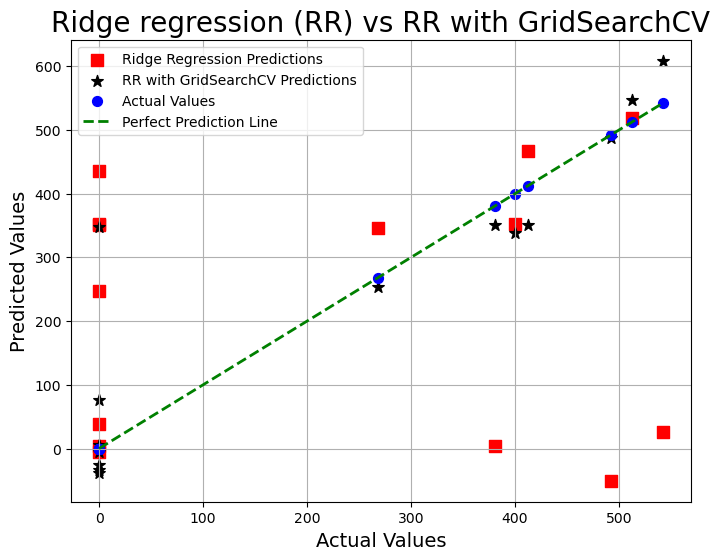

In [ ]:
# Set figure size
plt.figure(figsize=(8, 6))

# Actual vs RR predictions (Square markers, blue color)
plt.scatter(y_test, y_test_pred, marker='s', color='red', s=75, label="Ridge Regression Predictions")

# Actual vs RR_GridSearchCV predictions (Triangle markers, orange color)
plt.scatter(y_test, y_test_pred_gs, marker='*', color='black', s=75, label="RR with GridSearchCV Predictions")

# Actual values (Round markers, green color)
plt.scatter(y_test, y_test, marker='o', color='blue', s=50, label="Actual Values")

# Reference line (Perfect prediction line y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='green', linestyle='--', linewidth=2, label='Perfect Prediction Line')

# Adding labels and legend
plt.title("Ridge regression (RR) vs RR with GridSearchCV", fontsize=20)
plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.legend()
plt.grid(True)

# Save the plot as an image
plt.savefig('RR vs RR with gridserach.tiff')

# Show plot
plt.show()

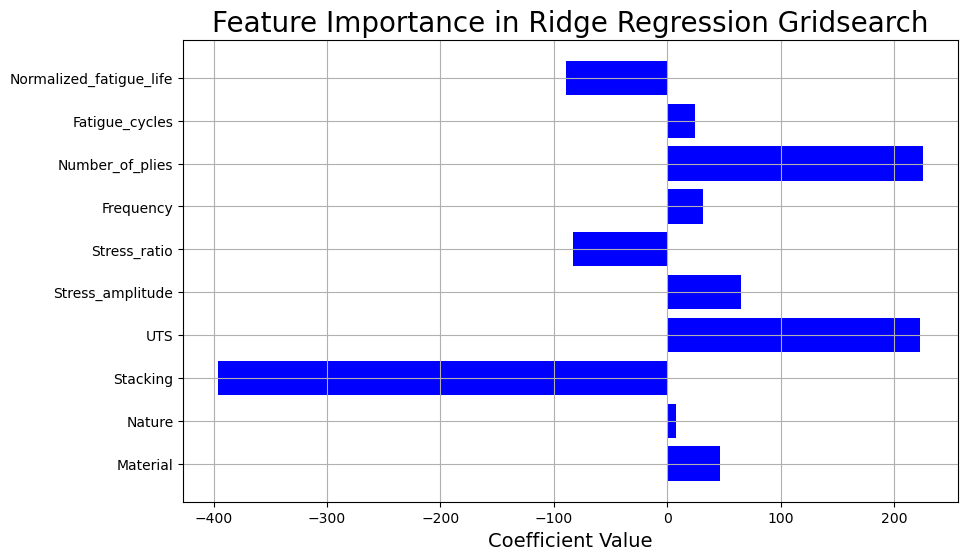

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Load the dataset from a CSV file
df = pd.read_csv('New Dataframe.csv')  # Replace 'your_file.csv' with the actual CSV file

# Define features (X) and target (y)
X = df.iloc[:, :-1]  # All columns except the last one are features
y = df.iloc[:, -1]   # The last column is the target variable
feature_names = X.columns  # Save feature names for later use

# Split data into train+validate and test sets (80% train+validate, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Split train+validate further into train and validation sets (65% train, 20% validate from original data)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.235, random_state=42)

# Create a pipeline that standardizes the data and applies Ridge Regression
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),   # Standardize features
    ('ridge', Ridge(alpha=0.01))     # Default Ridge Regression
])

# Fit the Ridge regression model on the training data
ridge_pipeline.fit(X_train, y_train)

# Extract the coefficients from the Ridge model
ridge_coefficients = ridge_pipeline.named_steps['ridge'].coef_

# ---------------------- Plot Feature Importance ----------------------

# Create a bar plot for feature importance (coefficients)
plt.figure(figsize=(10, 6))
plt.barh(feature_names, ridge_coefficients, color='blue')
plt.xlabel('Coefficient Value', fontsize=14)
plt.title('Feature Importance in Ridge Regression Gridsearch', fontsize=20)
plt.grid(True)

# Save the plot as an image
plt.savefig('RR_featureimportance.tiff', bbox_inches='tight', pad_inches=0.1)  # Add padding to avoid clipping)
plt.show()